# Eigenvectors and Eigenvalues

Assume we have three vectors in the three-dimensional space as we know it: $\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3\in\mathbb{R}^3$.
For simplicity, let:
\begin{equation*}
    \mathbf{u}_1=
    \begin{bmatrix}
    1 \\ 0 \\ 0
    \end{bmatrix},
    \mathbf{u}_2=
    \begin{bmatrix}
    0 \\ 1 \\ 0
    \end{bmatrix},
    \mathbf{u}_3=
    \begin{bmatrix}
    0 \\ 0 \\ 1
    \end{bmatrix}
\end{equation*},

and we plot it in the next cells:

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# some helpful functions

def set_fig(xlim, ylim, zlim):
    fig = plt.figure(figsize=(10, 10))
    axis = plt.axes(projection='3d')
    axis.set_xlim(*xlim)
    axis.set_ylim(*ylim)
    axis.set_zlim(*zlim)

    axis.set_xlabel('$x$', fontsize=20)
    axis.set_ylabel('$y$', fontsize=20)
    axis.set_zlabel('$z$', fontsize=20)

    return fig, axis

def plot_vec(axis, u, color='k', text='', plot_proj=False):
    
    axis.quiver(0 ,0, 0, u[0, 0], u[1, 0], u[2, 0], color=color, arrow_length_ratio=0.15)
    axis.text(u[0,0], u[1, 0], u[2, 0], text, fontsize=14, color=color)

    if plot_proj:
        axis.scatter(u[0, 0], u[1, 0], 0, alpha=0.6, color=color)
        axis.plot3D([u[0, 0],  u[0, 0]], [u[1, 0], u[1, 0]], [0, u[2, 0]], color=color, ls='--', alpha=0.6)

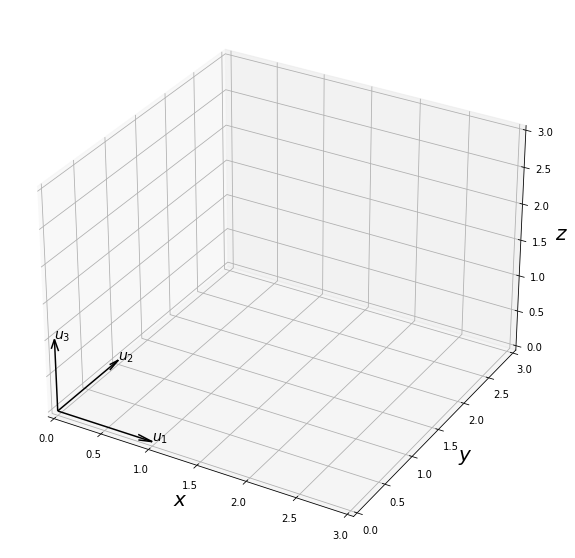

In [115]:
# setting figure
fig, axis = set_fig([0, 3], [0, 3], [0, 3])

# creating u1, u2, u3, as columns in U matrix which is the identity matrix
U = np.eye(3)

# plotting
for i in range(len(U)):
    u = U[:, i].reshape(-1, 1)
    plot_vec(axis, u, text=f'$u_{i+1}$')

Now, let apply a linear transformation on the vectors in the form of $A\mathbf{u}$.
That means $A\in\mathbb{R}^{3\times 3}$.
Let:
\begin{equation*}
    A=
    \begin{bmatrix}
    2 & 1 & 0 \\ 0 & 2 & 1 \\ 0 & 0 & 2
    \end{bmatrix}
\end{equation*}.

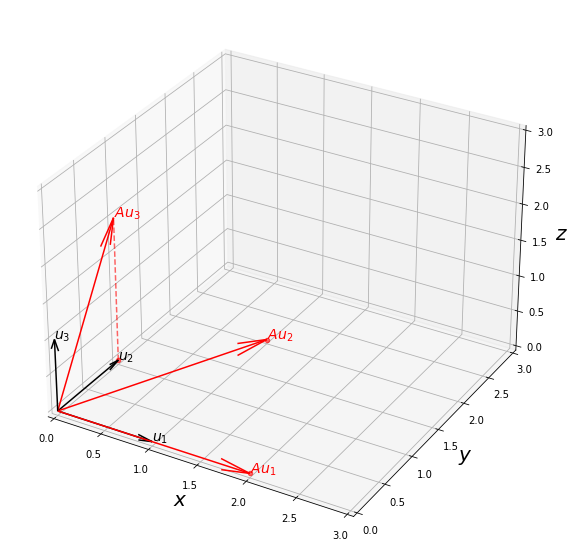

In [120]:
# setting figure
fig, axis = set_fig([0, 3], [0, 3], [0, 3])

# plotting u1, u2, u3
for i in range(len(U)):
    u = U[:, i].reshape(-1, 1)
    plot_vec(axis, u, text=f'$u_{i+1}$')

A = np.array([
    [2, 1, 0],
    [0, 2, 1],
    [0, 0, 2]
])

# plotting Au1, Au2, Au3
for i in range(len(U)):
    u = U[:, i].reshape(-1, 1)
    plot_vec(axis, A@u, color='red', text=f'$Au_{i+1}$', plot_proj=True)

Applying this linear transformation results in the change of all three vectors.
However, you may notice that while $A\mathbf{u}_3$ and $A\mathbf{u}_2$ did not preserved the same direction they had before, $A\mathbf{u}_1$ is at the same direction of $\mathbf{u}_1$, namely, it only got scaled.
Therefore, it can be written:
\begin{align*}
    &A\mathbf{u}_1 = \lambda\mathbf{u}_1,\quad\text{with}\quad\lambda\in\mathbb{R}, \\
    &\Rightarrow A\mathbf{u}_1-\lambda\mathbf{u}_1 = 0 \\
    &\Rightarrow (A-\lambda I)\mathbf{u}_1 = 0 \\
    &\Rightarrow \mathbf{u}_1\in\mathcal{N}_{(A-\lambda I)}.
\end{align*}

Or according to the definition, $\mathbf{u}_1$ is an eigenvector of $A$ corresponding to the eigenvalue $\lambda$.
In that case, it easy to see that $\lambda=2$ and $\mathbf{u}_1$ is the only linear independent eigenvector.
Let's have another example of:

\begin{equation*}
    A=
    \begin{bmatrix}
    2 & 1 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 2
    \end{bmatrix}
\end{equation*},

note that middle right value is $0$ now.

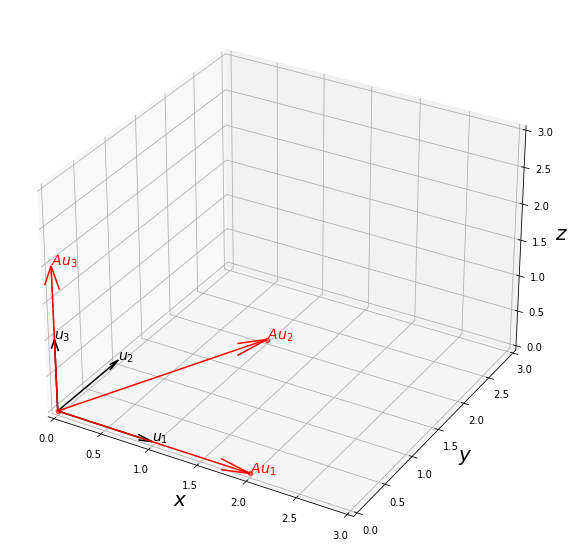

In [121]:
# setting figure
fig, axis = set_fig([0, 3], [0, 3], [0, 3])

# plotting u1, u2, u3
for i in range(len(U)):
    u = U[:, i].reshape(-1, 1)
    plot_vec(axis, u, text=f'$u_{i+1}$')

A = np.array([
    [2, 1, 0],
    [0, 2, 0],
    [0, 0, 2]
])

# plotting Au1, Au2, Au3
for i in range(len(U)):
    u = U[:, i].reshape(-1, 1)
    plot_vec(axis, A@u, color='red', text=f'$Au_{i+1}$', plot_proj=True)

$A\mathbf{u}_3$ only got scaled by a factor of 2 as well, meaning:

\begin{align*}
    \mathbf{u}_1, \mathbf{u}_3\in\mathcal{N}_{(A-\lambda I)} \quad \text{and}\quad\dim\mathcal{N}_{(A-\lambda I)}=2.
\end{align*}

Now, if you find 3 linearly independent eigenvectors of A, you can actually do something really useful.
Let:
\begin{equation*}
    A=
    \begin{bmatrix}
    1 & 1 & 1 \\ 0 & 2 & 2 \\ 0 & 0 & 3
    \end{bmatrix}
\end{equation*}.

You can search for all eigenvalues and eigenvectors just by all possible $\lambda$ for which $\mathcal{N}_{A-\lambda I}\neq\lbrace\mathbf{0}\rbrace$.
For example,
\begin{equation*}
    A-\lambda I=
    \begin{bmatrix}
    1-\lambda & 1 & 1 \\ 0 & 2-\lambda & 2 \\ 0 & 0 & 3-\lambda
    \end{bmatrix}
\end{equation*}.

It is easy to see that when $\lambda=1$:
\begin{equation*}
    A-\lambda I=
    \begin{bmatrix}
    0 & 1 & 1 \\ 0 & 1 & 2 \\ 0 & 0 & 2
    \end{bmatrix}
    \rightarrow
    \begin{bmatrix}
    0 & 1 & 1 \\ 0 & 1 & 2 \\ 0 & 0 & 2
    \end{bmatrix}
    \begin{bmatrix}
    1 \\ 0 \\ 0
    \end{bmatrix}
    =
    \mathbf{0}
\end{equation*},

$\mathbf{u}_1=\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$ is the eigenvector corresponding to $\lambda=1$.
At the same way you can easily find that,

$\mathbf{u}_2=\begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix}$ is the eigenvector corresponding to $\lambda=2$,

$\mathbf{u}_3=\begin{bmatrix} 3/2 \\ 2 \\ 1 \end{bmatrix}$ is the eigenvector corresponding to $\lambda=3$.

(The practical way is to use determinants for calculating the characteristic polynomial whose roots are the eigenvalues).

Now since:

$A\mathbf{u}_1=1\mathbf{u}_1$

$A\mathbf{u}_2=2\mathbf{u}_2$

$A\mathbf{u}_3=3\mathbf{u}_3$

We can write it in a matrix form with $U=[\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3]$ and $D=\begin{bmatrix}
    1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 3
    \end{bmatrix}$:

\begin{align*}
    A
    \begin{bmatrix}
    \mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3
    \end{bmatrix}
    &=
    \begin{bmatrix}
    \mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3
    \end{bmatrix}
    \begin{bmatrix}
    1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 3
    \end{bmatrix} \\
    AU&=UD 
    \\
    A&=UDU^{-1}
\end{align*}

Note that $U$ is invertible since all eigenvectors are linearly independent.
This is a powerful representation and tells us what vector are get scaled and by how much.
This is the simplest case of Jordan form, usually all eigenvectors will not be enough to form an invertible matrix and D will not be diagonal but composed of Jordan cells.
Let's test it:

In [149]:
U = np.array([
    [1, 1, 3/2], 
    [0, 1, 2],
    [0, 0, 1]
])

D = np.array([
    [1, 0, 0], 
    [0, 2, 0],
    [0, 0, 3]
])

U_inv = np.linalg.inv(U)

U @ D @ U_inv

array([[1., 1., 1.],
       [0., 2., 2.],
       [0., 0., 3.]])

As you can see, we got A.
See the illustration of the legendary Youtube channel, 3Blue1Brown:
[click here](https://www.youtube.com/watch?v=PFDu9oVAE-g).